In [1]:
from ipp_toolkit.experiments.comparing_ipp_approaches import compare_planners
from ipp_toolkit.planners.diversity_planner import BatchDiversityPlanner
from ipp_toolkit.planners.masked_planner import (
    RandomSamplingMaskedPlanner,
    LawnmowerMaskedPlanner,
    RandomWalkMaskedPlanner,
)
from ipp_toolkit.data.domain_data import SafeForestGMapGreennessRegressionData
from ipp_toolkit.predictors.uncertain_predictors import GaussianProcessRegression
from ipp_toolkit.predictors.masked_image_predictor import (
    UncertainMaskedLabeledImagePredictor,
    EnsambledMaskedLabeledImagePredictor,
)

from sklearn.neural_network import MLPRegressor


/home/frc-ag-1/anaconda3/envs/ipp-toolkit/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the constants
N_CANDIDATE_LOCATIONS_DIVERSITY = 200
RANDOM_WALK_STEP = 50
VISIT_N_LOCATIONS = 20
VIS_PLAN = True
N_TRIALS = 10
N_FLIGHTS = 10

N_LAWNMOWER_SAMPLES = N_FLIGHTS * VISIT_N_LOCATIONS

# Create the dataset
data = SafeForestGMapGreennessRegressionData()

# Create your different planners
planners = [
    RandomSamplingMaskedPlanner(data),
    RandomWalkMaskedPlanner(data),
    LawnmowerMaskedPlanner(data, N_LAWNMOWER_SAMPLES),
    BatchDiversityPlanner(data, n_candidate_locations=N_CANDIDATE_LOCATIONS_DIVERSITY),
]
# Name them for visualization later
planner_names = [
    "Random sampler",
    "Random walk planner",
    "Lawnmower planner",
    "Diversity planner",
]
# Add planner-specific keyword arguments
planner_kwargs = [
    {"vis": VIS_PLAN},
    {"vis": VIS_PLAN, "step_size": RANDOM_WALK_STEP},
    {"vis": VIS_PLAN},
    {"vis": VIS_PLAN},
]


Saving to None


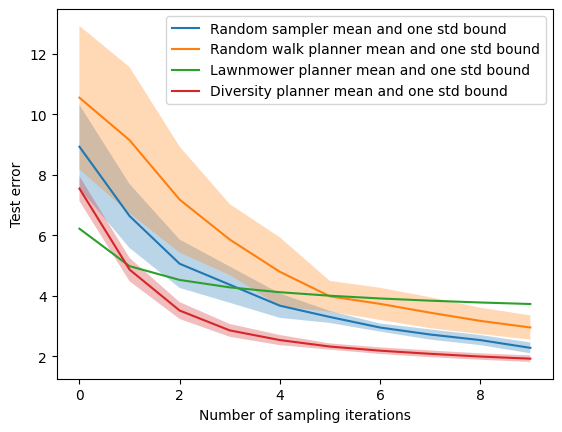

In [3]:
# Create a prediction model
model = GaussianProcessRegression()
# Create a gridded predictor
predictor = UncertainMaskedLabeledImagePredictor(
    data, model, classification_task=data.is_classification_dataset()
)

# Run the comparison
compare_planners(
    planners=planners,
    predictor=predictor,
    each_planners_kwargs=planner_kwargs,
    planner_names=planner_names,
    data_manager=data,
    visit_n_locations=VISIT_N_LOCATIONS,
    n_trials=N_TRIALS,
    n_flights=N_FLIGHTS,
)


Saving to None


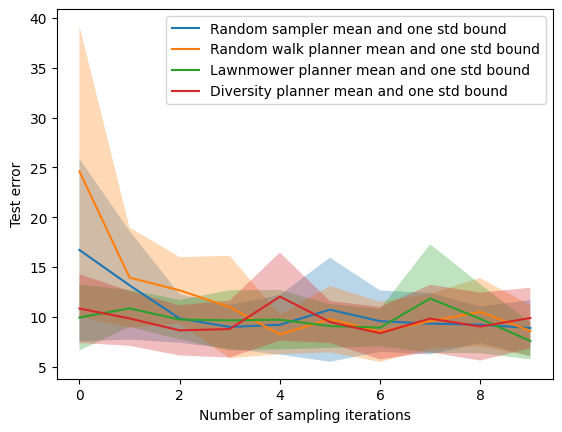

In [4]:
# Create a prediction model
model = MLPRegressor()
# Create a gridded predictor
predictor = EnsambledMaskedLabeledImagePredictor(
    data, model, classification_task=data.is_classification_dataset()
)

# Run the comparison
compare_planners(
    planners=planners,
    predictor=predictor,
    each_planners_kwargs=planner_kwargs,
    planner_names=planner_names,
    data_manager=data,
    visit_n_locations=VISIT_N_LOCATIONS,
    n_trials=N_TRIALS,
    n_flights=N_FLIGHTS,
)
